In [1]:
import sys
sys.path.append('../utils')
import mesh_tools as mt
import torch
import torch.nn as nn
from custom_voronoi import VoronoiValues
from meshplot import plot
import numpy as np
import numpy as np
from pytorch3d.ops import knn_points
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
from plyfile import PlyData, PlyElement
plydata = PlyData.read('bonsai.ply')

FileNotFoundError: [Errno 2] No such file or directory: 'bonsai.ply'

In [6]:
xyz = np.column_stack((np.array(plydata.elements[0].data['x']), np.array(plydata.elements[0].data['y']), np.array(plydata.elements[0].data['z'])))
density = np.array(plydata.elements[0].data['density'])

max_l = 3
mask = ((xyz<max_l)*(xyz>-max_l)).all(-1)
xyz = xyz[mask]/max_l
density = density[mask]

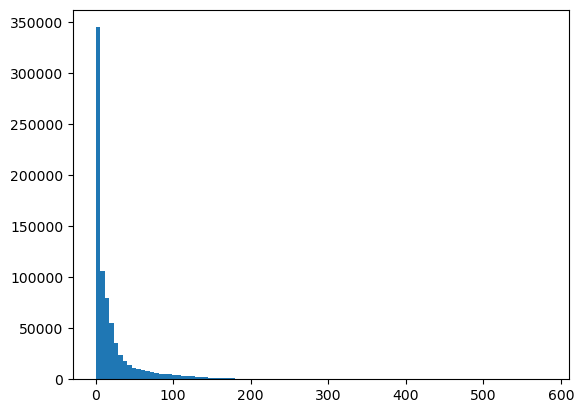

In [7]:
plt.hist(density, bins=100)
plt.show()

In [13]:
subf=1
density_treshold = 50

V = VoronoiValues(xyz[::subf], density[::subf]-density_treshold)
nv, nf = V.to_mesh()


In [14]:
mt.export_obj(nv, nf, 'voronoi_bonsai.obj')

In [15]:
!du -sh voronoi_bonsai.obj.obj

94M	voronoi_bonsai.obj.obj
